# Claims Prediction

This exercise is related to the contents of *Chapter 5* of *Applied Machine Learning for Healthcare and Life Sciences Using AWS*.

In this exercise, we are going to build a machine learning model to predict the average claim amount for Medicare patients. Make sure you have completed the steps in the *Chapter 5* feature engineering section before running this notebook. 

Let's start by importing the necessary Python libraries into the notebook.  

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

Next, enter the S3 URI for the location of the file exported from data wrangler between the double quotes ("") and run the cell. Let's look at a sample of our training data.

In [ ]:
df = pd.read_csv("") #enter the S3 URI for the file exported from data wranger between the double quotes.
df.head()

,BENE_SEX_IDENT_CD,BENE_AGE_CAT_CD,IP_CLM_DAYS_CD,IP_DRG_QUINT_PMT_AVG,IP_DRG_QUINT_PMT_CD,"""Diagnosis related group""","""International Classification of Diseases"""
0,2,4,4,86240,4,"""Trach w MV 96+ hrs or PDX exc face","""Larynx trachea ops nec"""
1,1,1,4,34878,5,"""Other digestive system O.R. procedures""","""Other abdomen region ops"""
2,2,2,1,3352,2,"""Female reproductive system reconstructive pro...","""Vagina & cul-de-sac ops"""
3,1,1,2,2690,1,"""G.I. hemorrhage""","""Intest incis/excis/anast"""
4,1,1,2,9143,5,"""Alcohol/drug abuse or dependence w/o rehabili...","""Psyche related procedure"""


We will now select our target column `IP_DRG_QUINT_PMT_AVG` and store it in a new variable, `y`.

In [ ]:
y=df.pop('IP_DRG_QUINT_PMT_AVG').values

There are two text columns in our dataset: **Diagnosis related group** and **International Classification of Diseases**. We will use a `TfIDF` vectorizer to generate vector representations of these colmns. To learn more about `TfIDF`, refer to the documentation here: https://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction

In [ ]:
vectorizer = TfidfVectorizer()
drg_vec=vectorizer.fit_transform(df.pop('"Diagnosis related group"').values).toarray()
proc_vec=vectorizer.fit_transform(df.pop('"International Classification of Diseases"').values).toarray()

We will now concatenate our structured and unstructured features into a single feature representation, and call it **X**. This creates a multimodal representation of our features.

In [ ]:
X=np.concatenate((df,drg_vec,proc_vec), axis=1)

Next, we will divide the data into train and test. We will use a random state to randomize the distribution of data in the train and test samples.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)
print(X_train.shape); print(X_test.shape)

(18428, 583)
(7899, 583)


Let us now train our model on the test data and generate predictions on the test data. We are using a random forest regression model for this exercise. To learn more about random forest, refer to the site here: https://scikit-learn.org/stable/modules/ensemble.html#forest

In [ ]:
rf = RandomForestRegressor(n_estimators=500, oob_score=True, random_state=100)
rf.fit(X_train, y_train) 
pred_rf = rf.predict(X_test)

Next, let's see how well our model did on unseen test data. We will use the **R2-score** to evaluate our regression model. To learn more about R2-score, refer to the following link: https://scikit-learn.org/stable/modules/model_evaluation.html#r2-score


In [ ]:
print(r2_score(y_test, pred_rf))

0.9329536902606165


The closer the score to 1.0, the better the model is. The score will vary for each run as we have a random sampling in the model training step. Let us now visualize the results to see how our predicted values differ from the actual values. We will use a scatter plot for this. 

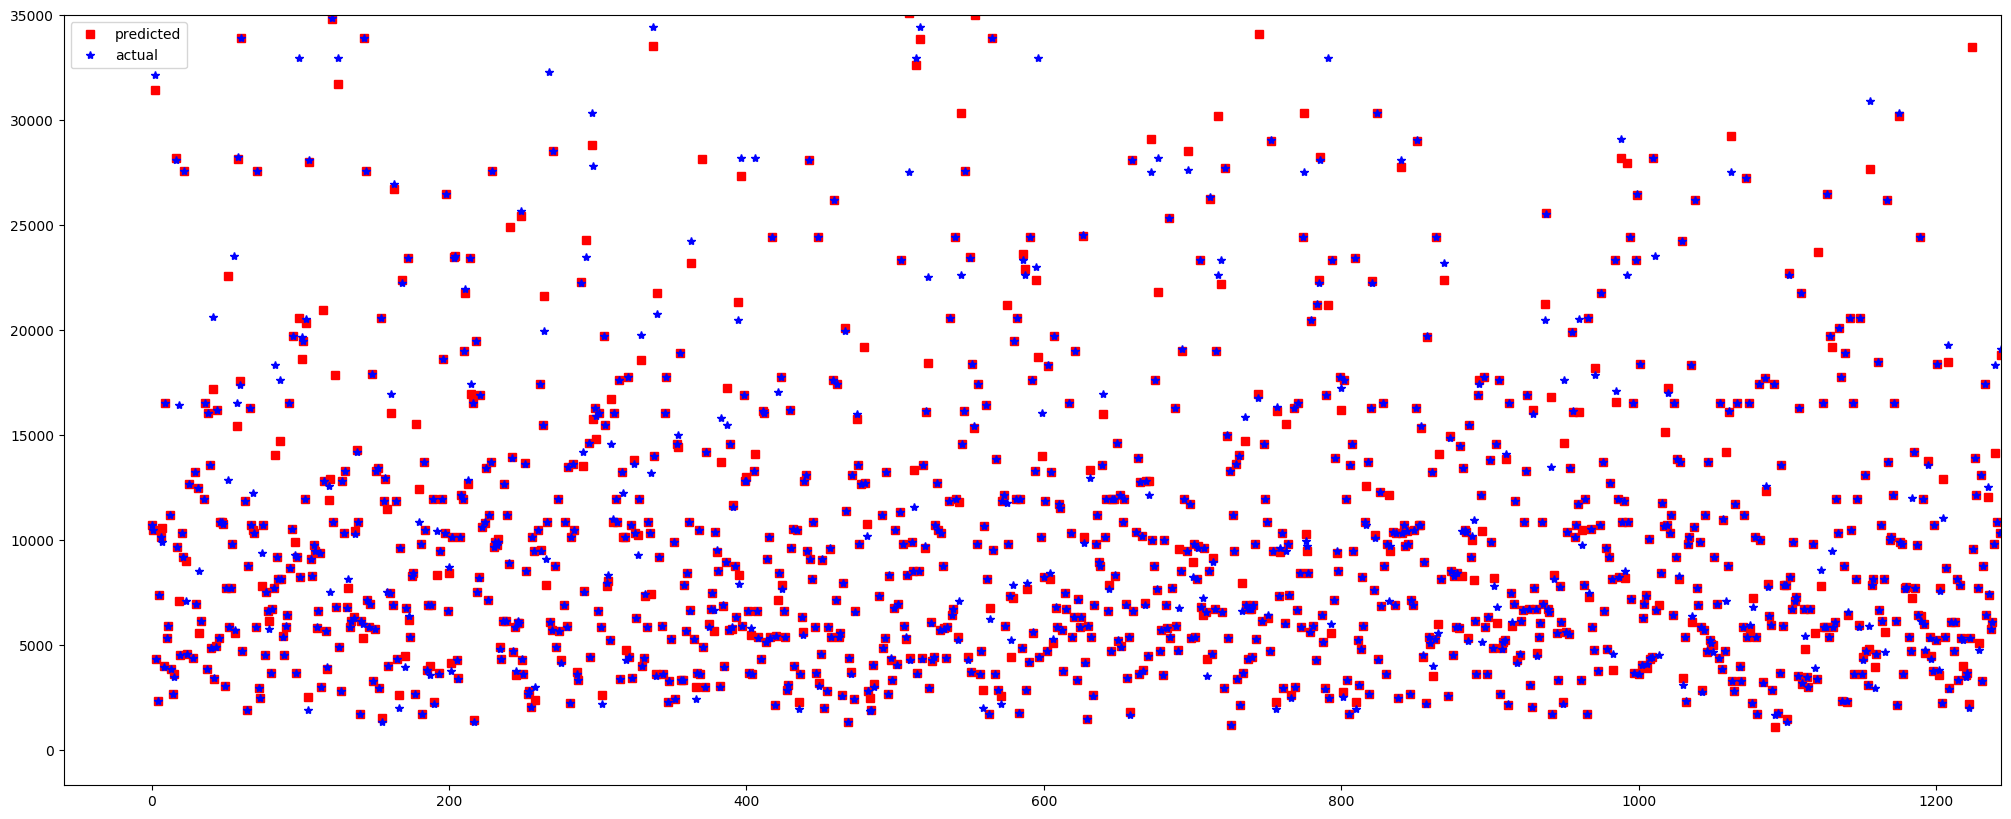

In [ ]:
plt.rcParams["figure.figsize"] = (25,10)
plt.plot(pred_rf,'rs',label='predicted')
plt.plot(y_test,'b*',label='actual')

xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()

scale_factor = 0.15
plt.xlim(xmin * scale_factor, xmax * scale_factor)
plt.ylim(ymin * scale_factor, ymax * scale_factor)


plt.legend()
plt.show()

The more the blue and the red dots overlap, the better the model!